<a href="https://colab.research.google.com/github/AnejVollmeier/Analiza-trga-kriptovalut-in-napoved-gibanja-cen/blob/main/Kriptovalute_Anej_Vollmeier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analiza trga kriptovalut in napoved gibanja cen**

##**Pridobivanje podatkov**

*Pridobimo podatke o kriptovalutah iz spletnega CoinGecko API-ja. Podatki se združijo v DataFrame, iz katerega izberemo samo pomembne stolpce. Na koncu podatke shranimo v CSV datoteko, ki jo uporabimo pri nadaljnji obdelavi.*

In [36]:
import requests
import pandas as pd
import time

all_data = []

for page in range(1, 4):  # 3 strani * 100 = 300
    url = "https://api.coingecko.com/api/v3/coins/markets"
    params = {
        "vs_currency": "eur",
        "order": "market_cap_desc",
        "per_page": 100,
        "page": page,
        "sparkline": "false",
        "price_change_percentage": "1h,24h,7d,30d,1y"
    }

    response = requests.get(url, params=params, timeout=30)

    # Zaščita pred preveč zahtevki
    if response.status_code == 429:
        print("Preveč zahtevkov – čakam 10 sekund …")
        time.sleep(10)
        response = requests.get(url, params=params, timeout=30)

    response.raise_for_status()
    all_data.extend(response.json())

    time.sleep(2)  # Obvezen zamik zaradi CoinGecko omejitev

df = pd.DataFrame(all_data)

columns = [
    "id",
    "symbol",
    "name",

    # Rang
    "market_cap_rank",
    "market_cap",
    "fully_diluted_valuation",

    # Cena
    "current_price",
    "total_volume",

    # Nihanje cen
    "high_24h",
    "low_24h",

    # Spremembe
    "price_change_percentage_1h_in_currency",
    "price_change_percentage_24h_in_currency",
    "price_change_percentage_7d_in_currency",
    "price_change_percentage_30d_in_currency",
    "price_change_percentage_1y_in_currency",
]

# Varno: izberi samo obstoječe stolpce
df = df.loc[:, [c for c in columns if c in df.columns]].copy()

df.to_csv(
    "coingecko_kriptovalute.csv",
    sep=";",
    decimal=",",
    index=False,
)

df.head()


,id,symbol,name,market_cap_rank,market_cap,fully_diluted_valuation,current_price,total_volume,high_24h,low_24h,price_change_percentage_1h_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_1y_in_currency
0,bitcoin,btc,Bitcoin,1,1485662396468,1485663586903,74417.000000,1.324248e+10,74596.000000,74089.000000,0.099855,0.309742,-1.285363,-5.491541,-17.786077
1,ethereum,eth,Ethereum,2,301128187279,301128187279,2495.060000,6.254161e+09,2503.990000,2478.470000,0.286777,0.407710,-1.883364,-3.919171,-21.538367
2,tether,usdt,Tether,3,158585583839,163270264252,0.848844,2.546565e+10,0.849081,0.848785,-0.001175,0.004021,-0.562722,-1.566513,-11.382843
3,binancecoin,bnb,BNB,4,98558395125,98558395125,715.570000,6.441412e+08,717.860000,708.380000,0.158194,0.992836,-1.680382,-7.445767,8.162433
4,ripple,xrp,XRP,5,95924746646,158339782278,1.580000,8.850404e+08,1.590000,1.560000,0.166302,1.174600,-4.100361,-17.056604,-22.917251


*Iz CSV datoteke naložimo podatke o kriptovalutah v DataFrame. Pri uvozu določimo ločilo, decimalni znak in stolpec **id** nastavimo kot indeks.*

In [37]:
df = pd.read_csv(
    "coingecko_kriptovalute.csv",
    sep=";",
    decimal=",",
    index_col = 0
)
df.head()

,symbol,name,market_cap_rank,market_cap,fully_diluted_valuation,current_price,total_volume,high_24h,low_24h,price_change_percentage_1h_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_1y_in_currency
id,,,,,,,,,,,,,,
bitcoin,btc,Bitcoin,1,1485662396468,1485663586903,74417.000000,1.324248e+10,74596.000000,74089.000000,0.099855,0.309742,-1.285363,-5.491541,-17.786077
ethereum,eth,Ethereum,2,301128187279,301128187279,2495.060000,6.254161e+09,2503.990000,2478.470000,0.286777,0.407710,-1.883364,-3.919171,-21.538367
tether,usdt,Tether,3,158585583839,163270264252,0.848844,2.546565e+10,0.849081,0.848785,-0.001175,0.004021,-0.562722,-1.566513,-11.382843
binancecoin,bnb,BNB,4,98558395125,98558395125,715.570000,6.441412e+08,717.860000,708.380000,0.158194,0.992836,-1.680382,-7.445767,8.162433
ripple,xrp,XRP,5,95924746646,158339782278,1.580000,8.850404e+08,1.590000,1.560000,0.166302,1.174600,-4.100361,-17.056604,-22.917251


##**Predprocesiranje podatkov**

*`df.shape` --> preverimo dimenzije DataFrame-a, torej število vrstic in stolpcev.*

In [38]:
df.shape

(300, 14)

*`df.info()` -->prikaže osnovne informacije o DataFrame-u, kot so imena stolpcev, tipi podatkov in število manjkajočih vrednosti.*

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, bitcoin to staked-frax-ether
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   symbol                                   300 non-null    object 
 1   name                                     300 non-null    object 
 2   market_cap_rank                          300 non-null    int64  
 3   market_cap                               300 non-null    int64  
 4   fully_diluted_valuation                  300 non-null    int64  
 5   current_price                            300 non-null    float64
 6   total_volume                             292 non-null    float64
 7   high_24h                                 297 non-null    float64
 8   low_24h                                  297 non-null    float64
 9   price_change_percentage_1h_in_currency   297 non-null    float64
 10  price_change_percentage_24h_in_curr

*`df.isnull().sum()`-->prikaže število manjkajočih vrednosti v vsakem stolpcu DataFrame-a*

In [40]:
df.isnull().sum()

,0
symbol,0
name,0
market_cap_rank,0
market_cap,0
fully_diluted_valuation,0
current_price,0
total_volume,8
high_24h,3
low_24h,3
price_change_percentage_1h_in_currency,3


*Odstranimo stolpce, ki niso pomembni za nadaljnjo analizo ali vsebujejo preveč manjkajočih vrednosti.*

*  symbol(ni pomemben)
*   name(ni pomemben)
*   price_change_percentage_1y_in_currency(prevec mankajočih vrednosti)





In [41]:
df = df.drop(columns=[
    "symbol",
    "name",
    "price_change_percentage_1y_in_currency",
])

df.head(3)

,market_cap_rank,market_cap,fully_diluted_valuation,current_price,total_volume,high_24h,low_24h,price_change_percentage_1h_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency,price_change_percentage_30d_in_currency
id,,,,,,,,,,,
bitcoin,1,1485662396468,1485663586903,74417.000000,1.324248e+10,74596.000000,74089.000000,0.099855,0.309742,-1.285363,-5.491541
ethereum,2,301128187279,301128187279,2495.060000,6.254161e+09,2503.990000,2478.470000,0.286777,0.407710,-1.883364,-3.919171
tether,3,158585583839,163270264252,0.848844,2.546565e+10,0.849081,0.848785,-0.001175,0.004021,-0.562722,-1.566513


*Izberemo vse številske stolpce in manjkajoče vrednosti zapolnimo z mediano. Nato preverimo, da v DataFrame-u ni več manjkajočih podatkov*

*   `median()`-->srednja vrednost v urejenem naboru podatkov



In [42]:
num = df.select_dtypes(exclude=object).columns
df[num] = df[num].fillna(df[num].median())

df.isnull().sum()

,0
market_cap_rank,0
market_cap,0
fully_diluted_valuation,0
current_price,0
total_volume,0
high_24h,0
low_24h,0
price_change_percentage_1h_in_currency,0
price_change_percentage_24h_in_currency,0
price_change_percentage_7d_in_currency,0


*Dodamo novo lastnost, ki meri relativno 24-urno volatilnost kriptovalut. S tem želimo bolje opisati, kako močno se cena posamezne kriptovalute spreminja glede na njeno trenutno vrednost.*

In [43]:
# Relativno 24h nihanje cen
df["range_24h_rel"] = (df["high_24h"] - df["low_24h"]) / df["current_price"]

df.isnull().sum()

,0
market_cap_rank,0
market_cap,0
fully_diluted_valuation,0
current_price,0
total_volume,0
high_24h,0
low_24h,0
price_change_percentage_1h_in_currency,0
price_change_percentage_24h_in_currency,0
price_change_percentage_7d_in_currency,0


*Standardiziramo številske podatke z uporabo* **StandardScaler**

In [44]:
from sklearn.preprocessing import StandardScaler

df[num] = StandardScaler().fit_transform(df[num])

df.head(3)

,market_cap_rank,market_cap,fully_diluted_valuation,current_price,total_volume,high_24h,low_24h,price_change_percentage_1h_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency,price_change_percentage_30d_in_currency,range_24h_rel
id,,,,,,,,,,,,
bitcoin,-1.726210,16.761009,11.692374,4.204027,7.663446,4.275641,4.365732,-0.223426,-0.187791,-0.101084,0.046672,0.006813
ethereum,-1.714664,3.316563,2.276068,-0.108516,3.554938,-0.098110,-0.096292,0.118498,-0.174292,-0.179665,0.082881,0.010228
tether,-1.703118,1.698706,1.180185,-0.258073,14.849569,-0.249973,-0.250672,-0.408234,-0.229917,-0.006124,0.137057,0.000349


##**Vizualizacija podatkov**

###**1. GRAF**

*Krožni diagram prikazuje, kolikšen delež celotne tržne kapitalizacije zavzema 5 največjih kriptovalut v primerjavi z vsemi ostalimi kriptovalutami skupaj.*

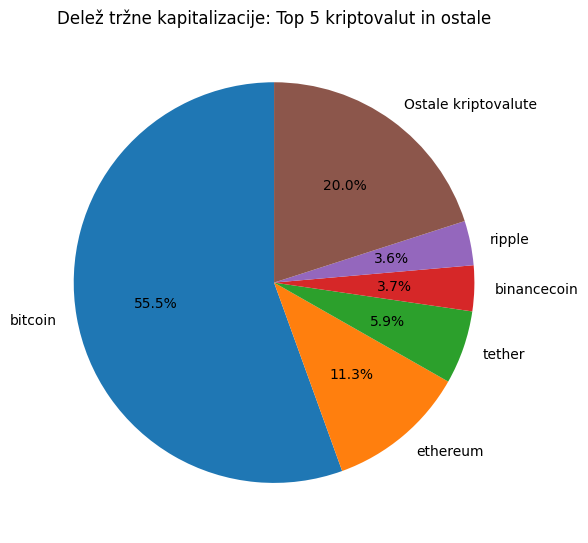

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

df_raw = pd.read_csv(
    "coingecko_kriptovalute.csv",
    sep=";",
    decimal=",",
    index_col=0
)

top5 = df_raw.sort_values("market_cap", ascending=False).head(5)

total_market_cap = df_raw["market_cap"].sum()

top5_caps = top5["market_cap"]

others_cap = total_market_cap - top5_caps.sum()

labels = list(top5.index) + ["Ostale kriptovalute"]
sizes = list(top5_caps) + [others_cap]

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct="%.1f%%",
    startangle=90
)
plt.title("Delež tržne kapitalizacije: Top 5 kriptovalut in ostale")
plt.tight_layout()
plt.show()


###**2. GRAF**

*Stolpčni graf prikazuje povprečna 24-urna nihanja cen kriptovalut v posameznih skupinah glede na njihov tržni rang.*

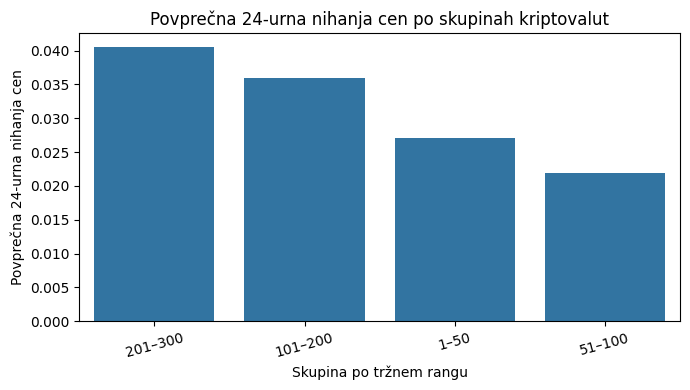

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Pripravimo podatke
df_rank = df.sort_values("market_cap_rank").copy()

# 2) Dodamo pozicijo
df_rank["rank_pos"] = np.arange(1, len(df_rank) + 1)

# 3) Ustvarimo skupine po rangu
df_rank["rank_group"] = "201–300"
df_rank.loc[df_rank["rank_pos"] <= 200, "rank_group"] = "101–200"
df_rank.loc[df_rank["rank_pos"] <= 100, "rank_group"] = "51–100"
df_rank.loc[df_rank["rank_pos"] <= 50,  "rank_group"] = "1–50"

# 4) Povprečna dnevna nihanja cen po skupinah
avg_change_by_rank = (
    df_rank.groupby("rank_group")["range_24h_rel"]
          .mean()
          .sort_values(ascending=False)
)

# 5) Barplot
plt.figure(figsize=(7, 4))
sns.barplot(x=avg_change_by_rank.index, y=avg_change_by_rank.values)
plt.title("Povprečna 24-urna nihanja cen po skupinah kriptovalut")
plt.xlabel("Skupina po tržnem rangu")
plt.ylabel("Povprečna 24-urna nihanja cen")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


###**3. GRAF**

*Ta graf prikazuje korelacijsko matriko izbranih numeričnih lastnosti v obliki toplotnega zemljevida.*

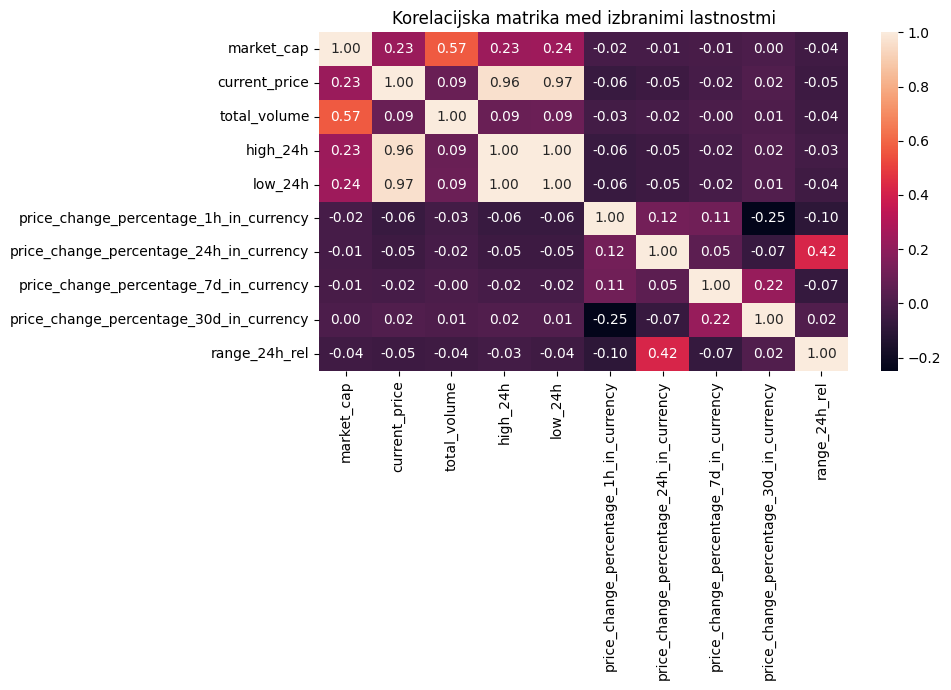

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = [
    "market_cap",
    "current_price",
    "total_volume",
    "high_24h",
    "low_24h",
    "price_change_percentage_1h_in_currency",
    "price_change_percentage_24h_in_currency",
    "price_change_percentage_7d_in_currency",
    "price_change_percentage_30d_in_currency",
    "range_24h_rel",
]

corr = df[num_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Korelacijska matrika med izbranimi lastnostmi")
plt.tight_layout()
plt.show()

##**Regresija**

###**Priprava podatkov za učenje modela**

*Določimo vhodne lastnosti (**vhod**), ki opisujejo trenutno stanje trga kriptovalut, ter izhodno spremenljivko (**izhod**), ki predstavlja 7-dnevno spremembo cene.*

In [48]:
vhod = df[
    [
        "market_cap",
        "total_volume",
        "current_price",
        "range_24h_rel",
        "price_change_percentage_1h_in_currency",
        "price_change_percentage_24h_in_currency",
    ]
]
izhod = df["price_change_percentage_7d_in_currency"]

*Razdelimo podatke na učno in testno množico. Učna množica se uporabi za učenje modela, testna pa za preverjanje, kako dobro se model nauči na novih podatkih.*

In [49]:
from sklearn.model_selection import train_test_split

#Razdekitev na ucno in testno mnozico
x_train, x_test, y_train, y_test = train_test_split(
    vhod, izhod, test_size=0.2, random_state=42
)

###**Linearna regresija**

*Uporabimo algoritem **linearna** regresija, s katerim model naučimo povezavo med vhodnimi lastnostmi in izhodno spremenljivko. Model nato uporabimo za napoved na testnih podatkih in njegovo uspešnost ocenimo z metrikama **MAE** in **R²**.*

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

#Uporaba algoritma
lin_reg = LinearRegression()

#Ucenje modela
lin_reg.fit(x_train, y_train)

#Napoved na testnih podatkih
rez_lin = lin_reg.predict(x_test)

# Metrike za vrednotenje uspešnosti modela
mae_lin = mean_absolute_error(y_test, rez_lin)
r2_lin = r2_score(y_test, rez_lin)

print("Linearna regresija")
print("MAE:", mae_lin)
print("R2:", r2_lin)

Linearna regresija
MAE: 0.42576301611961187
R2: -0.011588388952175288


###**Naključni gozd regresija**

*Uporabimo algoritem **Random Forest** regresija, ki temelji na več odločitvenih drevesih. Model naučimo na učnih podatkih, nato pa ocenimo njegovo uspešnost na testnih podatkih z metrikama **MAE** in **R²**.*

In [51]:
from sklearn.ensemble import RandomForestRegressor

#Uporaba algoritma
rf_reg = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

#Ucenje modela
rf_reg.fit(x_train, y_train)

#Napoved na testnih podatkih
rez_rf = rf_reg.predict(x_test)

# Metrike za vrednotenje uspešnosti modela
mae_rf = mean_absolute_error(y_test, rez_rf)
r2_rf = r2_score(y_test, rez_rf)

print("Naključni gozd regresija")
print("MAE:", mae_rf)
print("R2:", r2_rf)

Naključni gozd regresija
MAE: 0.3803310510731077
R2: 0.0176887586835337


###**Rezultati regresijskih modelov**

*Primerjamo uspešnost **linearne** regresije in **Random Forest** regresije. Na podlagi metrik **MAE** in **R²**.*

*Metriki smo izbrali, ker skupaj omogočata jasno oceno natančnosti napovedi in splošne uspešnosti regresijskega modela.*

*   **MAE (Mean Absolute Error)**-->meri povprečno absolutno razliko med dejanskimi in napovedanimi vrednostmi.


*   **R² (koeficient determinacije)** -->pove, kako dobro model pojasni razpršenost podatkov, pri čemer višja vrednost pomeni boljše prileganje modela podatkom.

In [52]:
print("Primerjava modelov")
print("Linearna regresija → MAE:", mae_lin, "R2:", r2_lin)
print("Naključni gozd → MAE:", mae_rf, "R2:", r2_rf)

Primerjava modelov
Linearna regresija → MAE: 0.42576301611961187 R2: -0.011588388952175288
Naključni gozd → MAE: 0.3803310510731077 R2: 0.0176887586835337
